<a href="https://colab.research.google.com/github/rzkamalia81/pytorch-test/blob/main/pytorch_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
#for save model in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Data**

In [4]:
transform = transforms.Compose([transforms.Resize((28,28)), transforms.ToTensor()])

train_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

training_loader = torch.utils.data.DataLoader(train_data, batch_size = 50, shuffle = True)
testing_loader = torch.utils.data.DataLoader(test_data, batch_size = 50, shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
print(len(train_data), len(test_data))

60000 10000


**Define Model**

In [6]:
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(784, 100)
    self.bn1 = nn.BatchNorm1d(100)
    self.hidden = nn.Linear(100, 50)
    self.bn2 = nn.BatchNorm1d(50)
    self.output = nn.Linear(50, 10)
    self.bn3 = nn.BatchNorm1d(10)

  def forward(self, x):
    y = self.bn1(self.input(x))
    y = self.bn2(self.hidden(y))
    y = self.bn3(self.output(y))
    return y

In [7]:
model = ANN()
model

ANN(
  (input): Linear(in_features=784, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden): Linear(in_features=100, out_features=50, bias=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=50, out_features=10, bias=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

**Training Process**

In [8]:
model.to(device)
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
params = list(model.parameters())
optimizer = optim.Adam(params, lr = 0.001)

In [9]:
train_loss_history = []
train_corrects_history = []
for e in range(20):
  train_loss = 0.0
  train_corrects = 0.0
  for inputs, labels in training_loader:
    inputs.to(device)
    labels.to(device)
    
    model.train()
    
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    train_loss += loss.item()
    train_corrects += torch.sum(preds == labels.data)

  epoch_loss = train_loss/len(training_loader)
  epoch_acc = train_corrects.float()/len(training_loader)
  train_loss_history.append(epoch_loss)
  train_corrects_history.append(epoch_acc)
   
  print('epoch :', (e+1))
  print('training loss: {:.4f}, training accuracy {:.4f} '.format(epoch_loss, epoch_acc.item()))

epoch : 1
training loss: 0.6681, training accuracy 42.9217 
epoch : 2
training loss: 0.4810, training accuracy 43.9942 
epoch : 3
training loss: 0.4199, training accuracy 44.4067 
epoch : 4
training loss: 0.3912, training accuracy 44.6683 
epoch : 5
training loss: 0.3683, training accuracy 44.8850 
epoch : 6
training loss: 0.3565, training accuracy 45.0108 
epoch : 7
training loss: 0.3429, training accuracy 45.2133 
epoch : 8
training loss: 0.3341, training accuracy 45.2967 
epoch : 9
training loss: 0.3247, training accuracy 45.3825 
epoch : 10
training loss: 0.3209, training accuracy 45.4283 
epoch : 11
training loss: 0.3134, training accuracy 45.5833 
epoch : 12
training loss: 0.3089, training accuracy 45.6125 
epoch : 13
training loss: 0.3061, training accuracy 45.6650 
epoch : 14
training loss: 0.3020, training accuracy 45.6775 
epoch : 15
training loss: 0.3009, training accuracy 45.6933 
epoch : 16
training loss: 0.2969, training accuracy 45.7558 
epoch : 17
training loss: 0.2947,

In [10]:
#save model from training process
torch.save(model, '/content/gdrive/My Drive/Colab Notebooks/model_pytorch_test.pth')

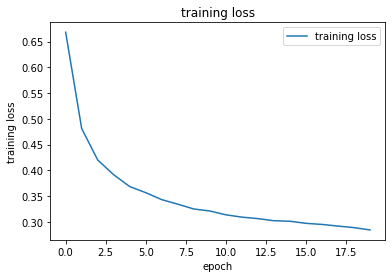

In [11]:
#plot training loss
epoch = range(20)
plt.plot(epoch, train_loss_history, label = 'training loss')
plt.title('training loss')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.legend()
plt.show()

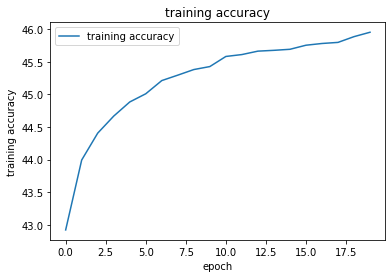

In [12]:
#plot training accuracy
epoch = range(20)
plt.plot(epoch, train_corrects_history, label = 'training accuracy')
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('training accuracy')
plt.legend()
plt.show()

**Testing Process**

In [13]:
#load model from training process
model_load = torch.load('/content/gdrive/My Drive/Colab Notebooks/model_pytorch_test.pth')
model_load.to(device)
model_load.eval()

ANN(
  (input): Linear(in_features=784, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden): Linear(in_features=100, out_features=50, bias=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=50, out_features=10, bias=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [18]:
total = 0
test_corrects = 0
for inputs, labels in testing_loader:
  inputs.to(device)
  labels.to(device)
  inputs = inputs.view(inputs.shape[0], -1)
  outputs = model_load(inputs)
  
  _, preds = torch.max(outputs, 1)
  total += labels.size(0)
  test_corrects += torch.sum(preds == labels.data)

print('testing accuracy of {:.4f} images: {:.4f} %'.format(total, 100 * test_corrects / total))

testing accuracy of 10000.0000 images: 92.1900 %


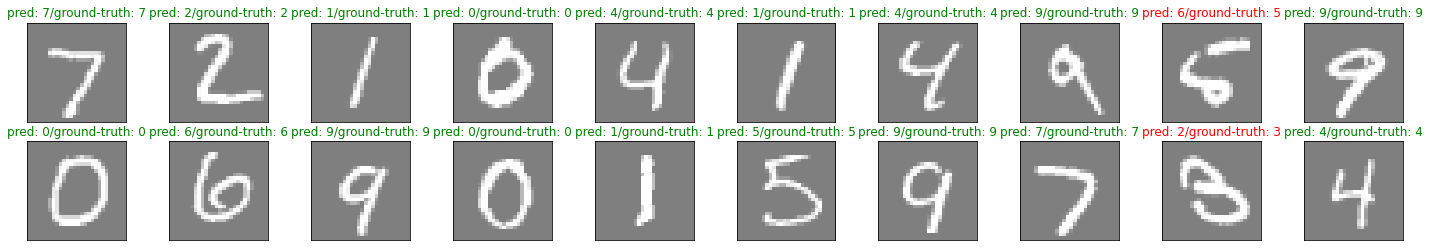

In [23]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

dataiter = iter(testing_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
images_ = images.view(images.shape[0], -1)
output = model_load(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize = (25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("pred: {}/ground-truth: {}".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))